In [111]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [112]:
cell = mp.Vector3(32,24,0)

In [113]:
n = 3.4                 # index of waveguide
w = 1                   # width of waveguide
r = 2                   # inner radius of ring
pad = 4                 # padding between waveguide and edge of PML
dpml = 2                # thickness of PML
sxy = 2*(r+w+pad+dpml)  # cell size
psrc = 3.6

s1 = mp.Cylinder(radius=r+w, material=mp.Medium(index=n),center=mp.Vector3(0,-4.1))
s2 = mp.Cylinder(radius=r,center=mp.Vector3(0,-4.1))

c1 = mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(0,-0.5),
                     material=mp.Medium(epsilon=11.68))
c2 = mp.Block(mp.Vector3(24,1,mp.inf),
                     center=mp.Vector3(-4,1),
                     material=mp.Medium(epsilon=11.68))
c3 = mp.Block(mp.Vector3(1,12,mp.inf),
                     center=mp.Vector3(7.5,7),
                     material=mp.Medium(epsilon=11.68))

In [114]:
geometry = [s1,s2,c1,c2,c3]

In [115]:
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-15,1))]

In [116]:
pml_layers = [mp.PML(1.0)]

In [117]:
resolution = 10

In [118]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [119]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000184059 s
Working in 2D dimensions.
Computational cell is 32 x 24 x 0 with resolution 10
     cylinder, center = (0,-4.1,0)
          radius 3, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,-4.1,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.68,11.68,11.68)
     block, center = (-4,1,0)
          size (24,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.68,11.68,11.68)
     block, center = (7.5,7,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.68,11.68,11.68)
time for set_epsilon = 0.202291 s

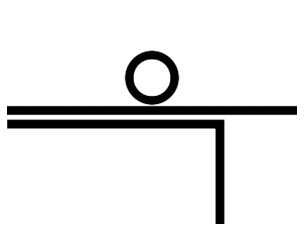

In [120]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

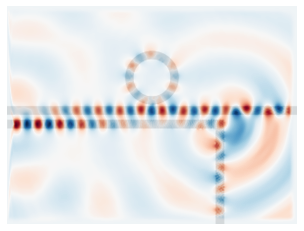

In [121]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()